## Data analysis for spotify music dataset

This part is for data analysis. See more detail for data visualization in "preprocessing" ipynb

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC

In [2]:
path = "Data\music.csv"
data_set = pd.read_csv(path)

In [3]:
data_set.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [4]:
data_set.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

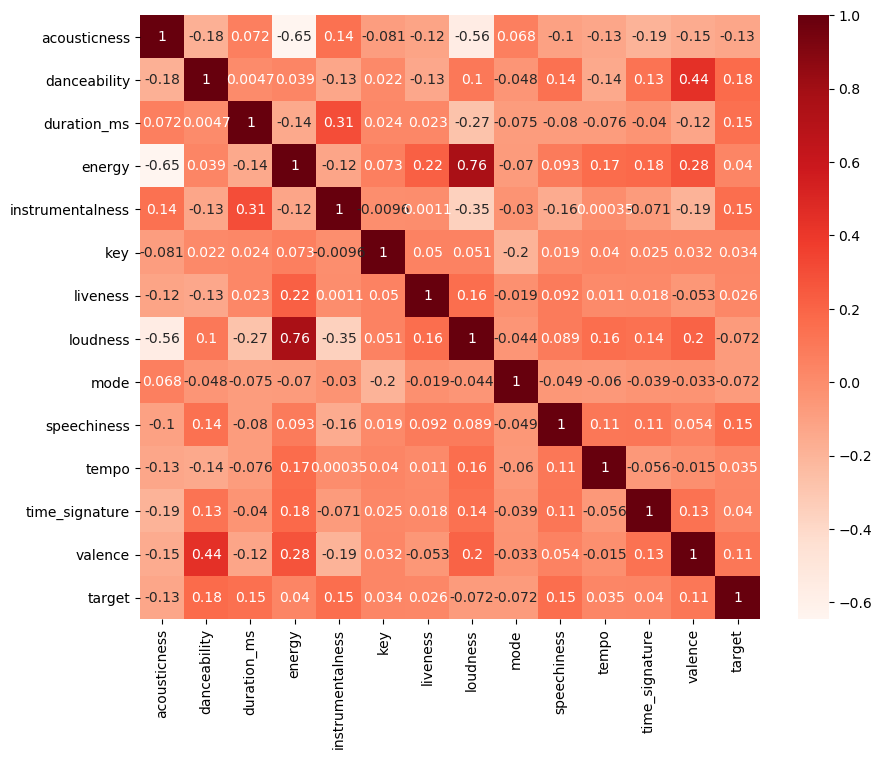

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(10,8), dpi = 100)
cor = data_set.drop(['id', 'song_title', 'artist'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Data normalization

In [6]:
# Data Normalization

data_set['key'] = data_set['key'].map(data_set['key'].value_counts())

minmax_cols = ['duration_ms', 'loudness', 'tempo']
scaler = MinMaxScaler()
data_set[minmax_cols] = scaler.fit_transform(data_set[minmax_cols])

numerical_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'key', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
ss = StandardScaler()
data_set[numerical_cols] = ss.fit_transform(data_set[numerical_cols])
data_set.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,0.021685,-0.166291,0.741141,1,3.763084,1.066709,4,-0.853039,1,Mask Off,Future
1,1,0.043897,0.773830,0.983716,-1.534468,-0.465683,1.646585,-0.346454,0.692162,1,-0.147529,1.442323,4,0.368970,1,Redbone,Childish Gambino
2,2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,0.021685,-0.204897,0.791369,1,2.183712,-1.745166,4,-1.310280,1,Xanny Family,Future
3,3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.378975,-0.634715,0.544709,1,-0.740350,-1.316964,4,-1.079636,1,Master Of None,Beach House
4,4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.378975,1.596735,0.654132,0,-0.258753,1.964120,4,1.647627,1,Parallel Lines,Junior Boys


In [7]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
X = data_set[features]
y = data_set['target'].values
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### This part is for KNN training and prediction

In [10]:
# different number of neighbors
num_neighbor = []
for i in range(20):
    num = 1 + i
    num_neighbor.append(num)
    
KNN_result_train, KNN_result_test = [], []
    
size = len(num_neighbor)
for x in num_neighbor:
    KNN = KNeighborsClassifier(n_neighbors=x)
    KNN.fit(X_train,y_train)
    re_train = round(KNN.score(X_train,y_train),2)    
    re_test = round(KNN.score(X_test,y_test),2)
    
    KNN_result_train.append(re_train)
    KNN_result_test.append(re_test)

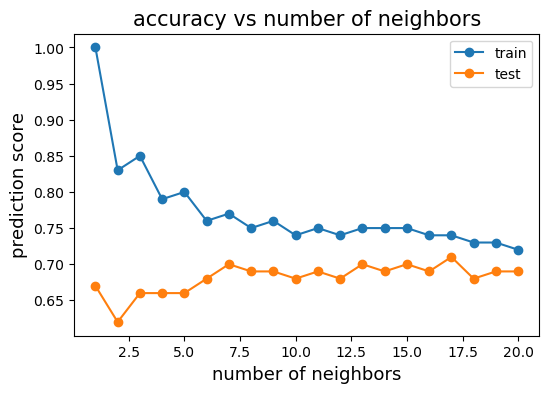

In [13]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("number of neighbors", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs number of neighbors", fontsize=15)
ax.plot(num_neighbor, KNN_result_train, marker='o', label="train")
ax.plot(num_neighbor, KNN_result_test, marker='o', label="test")
ax.legend()
plt.show()

In [20]:
#iv. K-Nearest Neighbors (K-NN)
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train,y_train)
KNN_result_train = round(KNN.score(X_train,y_train)*100,2)
print('KNN training: ', KNN_result_train)

KNN_result_test = round(KNN.score(X_test,y_test)*100,2)
print('KNN testing: ', KNN_result_test)

KNN training:  75.14
KNN testing:  69.55


Text(0.5, 33.22222222222222, 'Features')

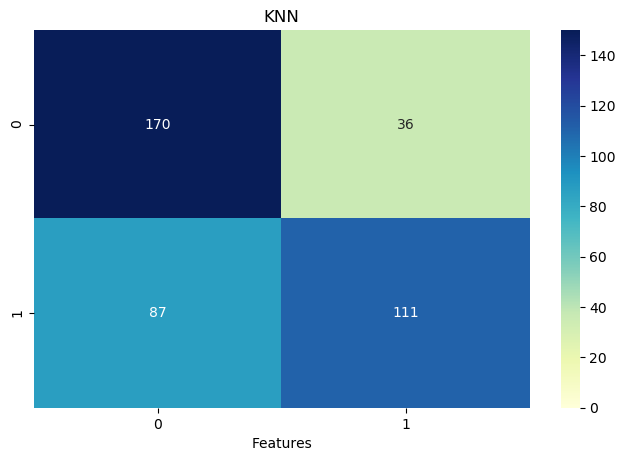

In [18]:
KNN_y_pred = KNN.predict(X_test)
KNNCM = confusion_matrix(y_test, KNN_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(KNNCM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('KNN')
axes.set_xlabel('Features')

### This part is for SVM training and prediction

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_result_train, SVM_result_test = [], []
for method in kernels:
    SVM = NuSVC(kernel=method, nu=0.5)
    SVM.fit(X_train, y_train)
    
    re_train = round(SVM.score(X_train,y_train),2)
    re_test = round(SVM.score(X_test,y_test),2)
    
    SVM_result_train.append(re_train)
    SVM_result_test.append(re_test)

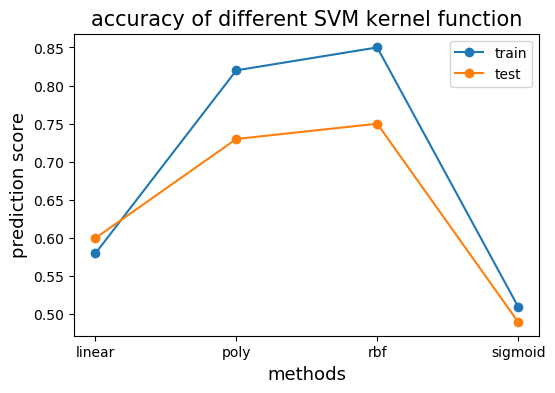

In [31]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("methods", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy of different SVM kernel function", fontsize=15)
ax.plot(kernels, SVM_result_train, marker='o', label="train")
ax.plot(kernels, SVM_result_test, marker='o', label="test")
ax.legend()
plt.show()

In [26]:
SVM = NuSVC(kernel='rbf', nu=0.5)
SVM.fit(X_train, y_train)

SVM_result_train = round(SVM.score(X_train,y_train)*100,2)
print('KNN training: ', SVM_result_train)

SVM_result_test = round(SVM.score(X_test,y_test)*100,2)
print('KNN testing: ', SVM_result_test)

KNN training:  84.75
KNN testing:  74.75


Text(0.5, 33.22222222222222, 'Features')

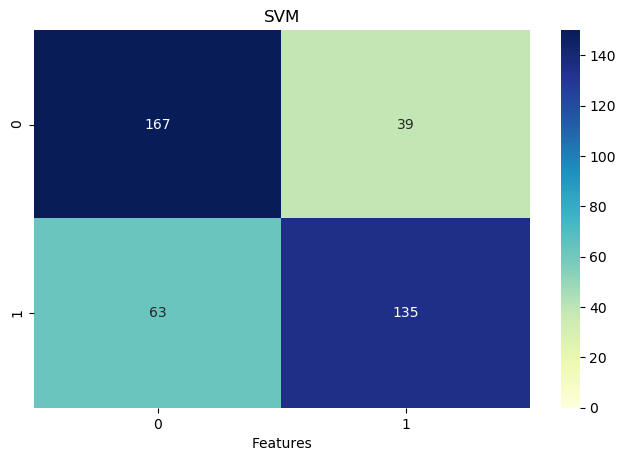

In [27]:
SVM_y_pred = SVM.predict(X_test)
SVMCM = confusion_matrix(y_test, SVM_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(SVMCM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('SVM')
axes.set_xlabel('Features')